In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
'''------------------ Explanatory data analysis (EDA) ------------------'''

# Summary statistics
round(df.describe(),2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [5]:
# Dimension
df.shape

(303, 14)

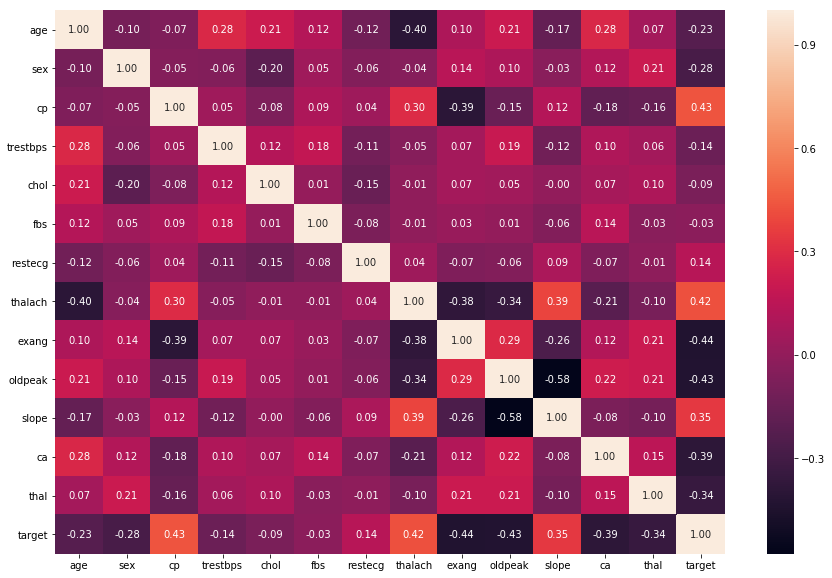

In [6]:
# Correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.savefig('corr.png')
plt.show()

1    165
0    138
Name: target, dtype: int64


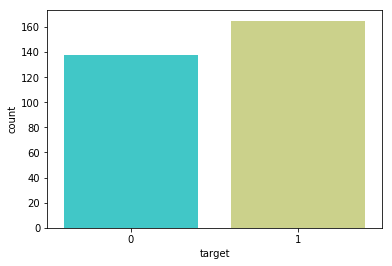

Percentage of patients heart disease absence: 45.54%
Percentage of patients heart presence: 54.46%


In [7]:
# Target analysis
print(df.target.value_counts())

sns.countplot(x="target", data=df, palette="rainbow")
plt.show()

countNoDisease_pct = len(df[df.target == 0]) / (len(df.target)) * 100
countHaveDisease_pct = len(df[df.target == 1]) / (len(df.target)) * 100
print("Percentage of patients heart disease absence: {:.2f}%".format(countNoDisease_pct))
print("Percentage of patients heart presence: {:.2f}%".format(countHaveDisease_pct))

In [8]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

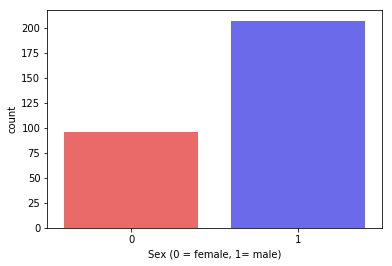

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [9]:
# Gender analysis
sns.countplot(x='sex', data=df, palette="seismic_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

countFemale_pct = len(df[df.sex == 0]) / (len(df.sex)) * 100
countMale_pct = len(df[df.sex == 1]) / (len(df.sex)) * 100
print("Percentage of Female Patients: {:.2f}%".format((countFemale_pct)))
print("Percentage of Male Patients: {:.2f}%".format((countMale_pct)))

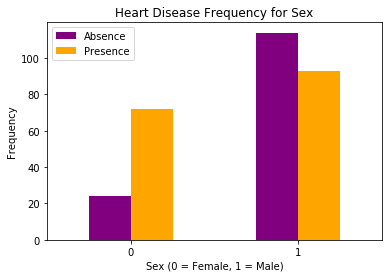

In [10]:
pd.crosstab(df.sex,df.target).plot(kind = "bar",color = ['purple','orange'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation = 0)
plt.legend(["Absence", "Presence"])
plt.ylabel('Frequency')
plt.show()

In [11]:
# Mean values for each variable
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


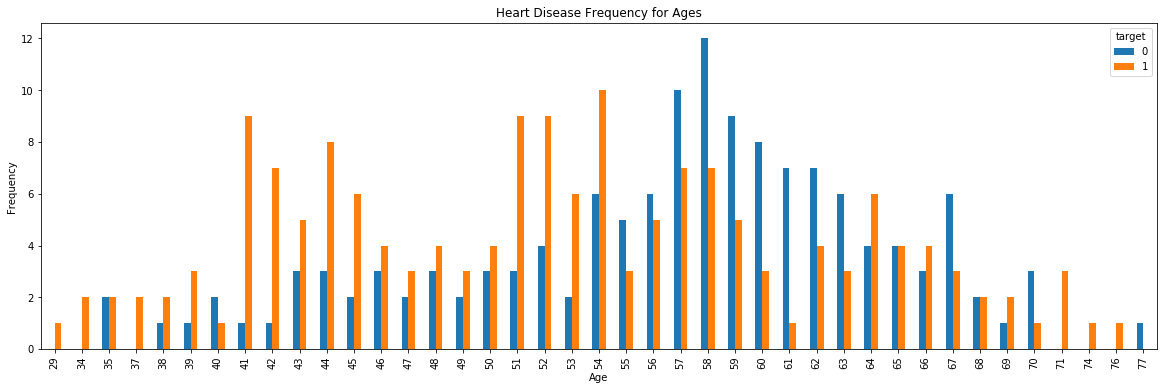

In [12]:
# Age analysis
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

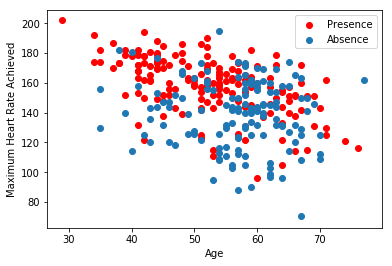

In [13]:
# Maximum Heart Rate Achieved vs Age
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], color="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Presence", "Absence"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate Achieved")
plt.show()

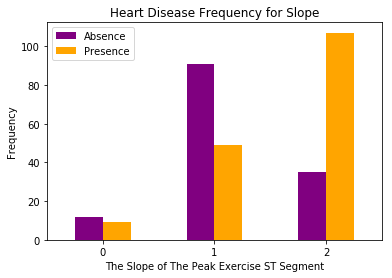

In [14]:
# The Slope of The Peak Exercise ST Segment
pd.crosstab(df.slope,df.target).plot(kind="bar", color = ['purple','orange'])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment')
plt.xticks(rotation = 0)
plt.legend(["Absence", "Presence"])
plt.ylabel('Frequency')
plt.show()

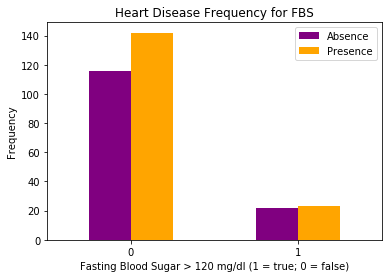

In [15]:
# Fasting blood sugar analysis
pd.crosstab(df.fbs,df.target).plot(kind="bar", color = ['purple','orange'])
plt.title('Heart Disease Frequency for FBS')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Absence", "Presence"])
plt.ylabel('Frequency')
plt.show()

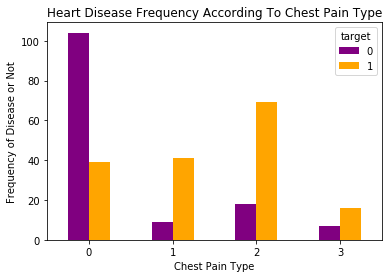

In [16]:
# Chest pain type analysis
pd.crosstab(df.cp,df.target).plot(kind="bar", color = ['purple','orange'])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

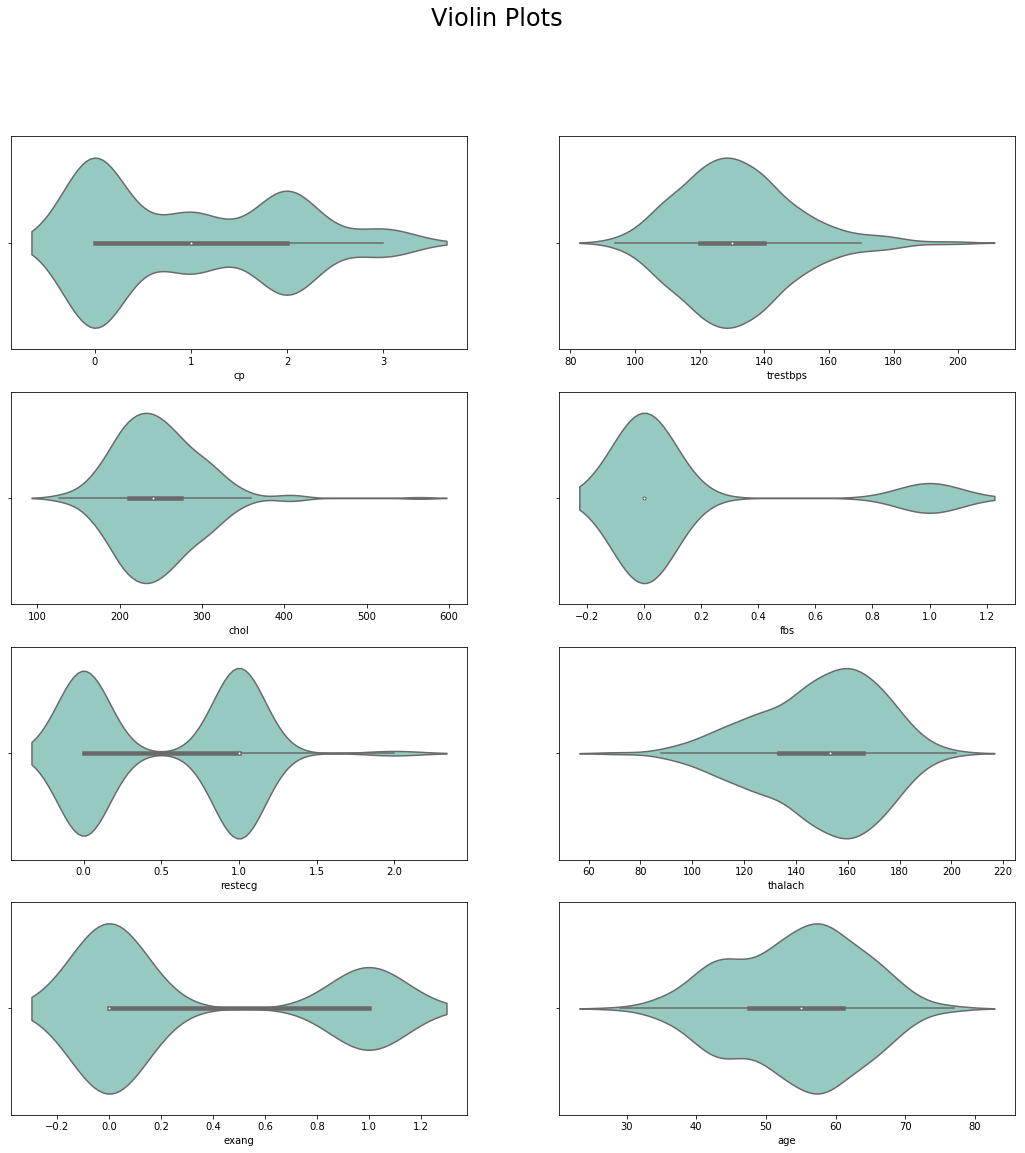

In [17]:
# Violin Plots
'''
A violin plot is a method of plotting numeric data. It is similar to box 
plot with a rotated kernel density plot on each side. Violin plots are 
similar to box plots, except that they also show the probability density 
of the data at different values (in the simplest case this could be a 
histogram).

A violin plot is more informative than a plain box plot. In fact while a 
box plot only shows summary statistics such as mean/median and interquartile 
ranges, the violin plot shows the full distribution of the data. The 
difference is particularly useful when the data distribution is multimodal 
(more than one peak). In this case a violin plot clearly shows the presence 
of different peaks, their position and relative amplitude. This information 
could not be represented with a simple box plot which only reports summary 
statistics. The inner part of a violin plot usually shows the mean 
(or median) and the interquartile range.
'''

fig, index = plt.subplots(nrows = 4, ncols = 2, figsize = (18,18))
plt.suptitle('Violin Plots',fontsize = 24)
sns.violinplot(x = "cp", data = df,ax = index[0,0],palette = 'Set3')
sns.violinplot(x = "trestbps", data = df,ax = index[0,1],palette = 'Set3')
sns.violinplot (x  = 'chol', data = df, ax = index[1,0], palette = 'Set3')
sns.violinplot(x = 'fbs', data = df, ax = index[1,1],palette = 'Set3')
sns.violinplot(x = 'restecg', data = df, ax = index[2,0], palette = 'Set3')
sns.violinplot(x = 'thalach', data = df, ax = index[2,1],palette = 'Set3')
sns.violinplot(x = 'exang', data = df, ax = index[3,0],palette = 'Set3')
sns.violinplot(x = 'age', data = df, ax = index[3,1],palette = 'Set3')
plt.show()

In [18]:
'''------------------ Creating Dummy Variables ------------------'''

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['restecg'], prefix = "restecg")
c = pd.get_dummies(df['slope'], prefix = "slope")
d = pd.get_dummies(df['ca'], prefix = "ca")
e = pd.get_dummies(df['thal'], prefix = "thal")
# f = pd.get_dummies(df['sex'], prefix = "sex")
# g = pd.get_dummies(df['fbs'], prefix = "fbs")

In [19]:
frames = [df, a, b, c, d, e]
df_dummy = pd.concat(frames, axis = 1)
df_dummy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,1,0,0,0,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,1,0,0,0,0,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,1,0,0,0,0,0,0,1,0


In [20]:
df_dummy = df_dummy.drop(columns = ['cp', 'restecg', 'thal', 'ca', 'slope'])

In [21]:
df_dummy.head(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,0,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,1,...,1,1,0,0,0,0,0,0,1,0
5,57,1,140,192,0,148,0,0.4,1,1,...,0,1,0,0,0,0,0,1,0,0
6,56,0,140,294,0,153,0,1.3,1,0,...,0,1,0,0,0,0,0,0,1,0
7,44,1,120,263,0,173,0,0.0,1,0,...,1,1,0,0,0,0,0,0,0,1
8,52,1,172,199,1,162,0,0.5,1,0,...,1,1,0,0,0,0,0,0,0,1
9,57,1,150,168,0,174,0,1.6,1,0,...,1,1,0,0,0,0,0,0,1,0


In [22]:
'''------------------ Normalization ------------------'''

# Define function
def normalize(x):
    x_norm = (x - np.min(x)) / (np.max(x) - np.min(x)).values
    return x_norm

In [23]:
df_norm = normalize(df_dummy)
df_norm.head(6)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.816794,0.0,0.129032,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.702290,1.0,0.096774,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.583333,1.0,0.433962,0.150685,0.0,0.587786,0.0,0.064516,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
df_norm.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1',
       'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2',
       'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [25]:
y = df_norm.target.values
x = df_norm.drop(['target'], axis = 1)

In [26]:
'''------------------ Train test split ------------------'''

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (242, 27)
x_test: (61, 27)
y_train: (242,)
y_test: (61,)


In [27]:
'''------------------ Logistic Regression ------------------'''

def initialize(dimension):
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

def sigmoid(z):
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_hat = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_hat) + (1-y_train)*np.log(1-y_hat))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_hat-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_hat-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_hat = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_hat.shape[1]):
        if y_hat[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)/100*100))
    return y_prediction[0]

iteration: 100
cost: 0.3396048068843612


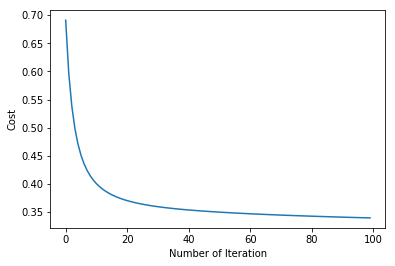

Manuel Test Accuracy: 91.80%


In [28]:
y_pred = logistic_regression(x_train.T, y_train.T, x_test.T, y_test.T, 1, 100)

In [29]:
cm_lr=confusion_matrix(y_test.T,y_pred.T)
print(cm_lr)
'''plt.figure(figsize=(15,10))
sns.heatmap(cm_lr,annot=True)
plt.show()'''

[[28  4]
 [ 1 28]]


'plt.figure(figsize=(15,10))\nsns.heatmap(cm_lr,annot=True)\nplt.show()'

In [30]:
# Sklearn Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lrscore = lr.score(x_test,y_test)*100
print("Test Accuracy {:.2f}%".format(lrscore))

Test Accuracy 91.80%


In [31]:
# 10-fold CV
parameters=[{
    'penalty':['l1','l2'],
    'C':[0.1,0.4,0.5],
    'random_state':[2]
    },]

lrcv = GridSearchCV(LogisticRegression(),parameters,scoring='accuracy')
lrcv.fit(x_train,y_train)
predictions = [(lrcv.predict(x_train),y_train,'Train'),
               (lrcv.predict(x_test),y_test,'Test'),]
cv_score = cross_val_score(estimator=LogisticRegression(), X = x_train, y = y_train, cv = 10)

lrscore_cv = cv_score.mean() * 100

print(np.round(cv_score,2))
print("10-fold CV Test Accuracy {:.2f}%".format(lrscore_cv))


[0.88 0.8  0.72 0.68 0.88 0.76 0.91 0.87 0.91 0.83]
10-fold CV Test Accuracy 82.42%


In [32]:
'''------------------ K-Nearest Neighbour (KNN) ------------------'''

n = 33
i = 0
k_scores=[]
for k in range(1,n,2):
    knn = KNeighborsClassifier(n_neighbors = k)  # n_neighbors means k
    knn.fit(x_train, y_train)
    prediction = knn.predict(x_test)
    k_scores.append(knn.score(x_test, y_test))
    print("{:>2}NN Score: {:.2f}%".format(k, k_scores[i]*100))
    i += 1

 1NN Score: 88.52%
 3NN Score: 90.16%
 5NN Score: 91.80%
 7NN Score: 91.80%
 9NN Score: 91.80%
11NN Score: 93.44%
13NN Score: 91.80%
15NN Score: 91.80%
17NN Score: 91.80%
19NN Score: 91.80%
21NN Score: 90.16%
23NN Score: 90.16%
25NN Score: 90.16%
27NN Score: 90.16%
29NN Score: 91.80%
31NN Score: 91.80%


In [33]:
knn = KNeighborsClassifier(n_neighbors = 11) 
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
knnscore = knn.score(x_test, y_test)*100
print("KNN Test Accuracy with k = 11: {:.2f}%".format(knnscore))

KNN Test Accuracy with k = 11: 93.44%


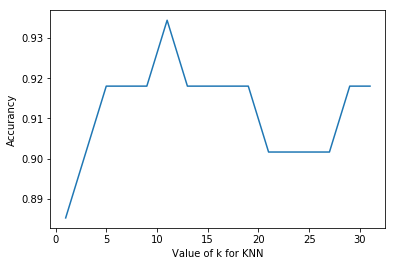

In [34]:
plt.figure()#figsize=(15,10))
plt.plot(range(1,n,2),k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel("Accurancy")
#plt.savefig('knn.png')
plt.show()

In [35]:
y_pred = knn.predict(x_test)
cm_knn=confusion_matrix(y_test,y_pred)
print(cm_knn)
'''plt.figure()
sns.heatmap(cm_knn,annot=True)
plt.show()'''

[[29  3]
 [ 1 28]]


'plt.figure()\nsns.heatmap(cm_knn,annot=True)\nplt.show()'

In [36]:
# 10-fold CV
parameters=[{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6],
    },]

knncv = GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
knncv.fit(x_train,y_train)
predictions = [(knncv.predict(x_train),y_train,'Train'),
               (knncv.predict(x_test),y_test,'Test'),]
cv_score = cross_val_score(estimator=KNeighborsClassifier(), X = x_train, y = y_train, cv = 10)

knnscore_cv = cv_score.mean() * 100

print(np.round(cv_score,2))
print("10-fold CV Test Accuracy {:.2f}%".format(knnscore_cv))


[0.8  0.76 0.76 0.8  0.92 0.84 0.87 0.78 0.78 0.87]
10-fold CV Test Accuracy 81.84%


In [37]:
'''------------------ Naïve Bayes ------------------'''

nb = GaussianNB()
nb.fit(x_train, y_train)
nbscore = nb.score(x_test,y_test)*100
print("Accuracy of Naive Bayes: {:.2f}%".format(nbscore))

Accuracy of Naive Bayes: 78.69%


In [38]:
y_pred = nb.predict(x_test)
cm_nb=confusion_matrix(y_test,y_pred)
print(cm_nb)
'''plt.figure()
sns.heatmap(cm_nb,annot=True)
plt.show()'''

[[31  1]
 [12 17]]


'plt.figure()\nsns.heatmap(cm_nb,annot=True)\nplt.show()'

In [39]:
# 10-fold CV
parameters=[{
    },]

nbcv = GridSearchCV(GaussianNB(),parameters,scoring='accuracy')
nbcv.fit(x_train,y_train)
predictions = [(nbcv.predict(x_train),y_train,'Train'),
               (nbcv.predict(x_test),y_test,'Test'),]
cv_score = cross_val_score(estimator=GaussianNB(), X = x_train, y = y_train, cv = 10)

nbscore_cv = cv_score.mean() * 100

print(np.round(cv_score,2))
print("10-fold CV Test Accuracy {:.2f}%".format(nbscore_cv))


[0.44 0.68 0.64 0.68 0.72 0.64 0.74 0.57 0.7  0.78]
10-fold CV Test Accuracy 65.83%


In [40]:
'''------------------ Decision Tree ------------------'''

dtc = DecisionTreeClassifier(random_state = 2)
dtc.fit(x_train, y_train)
dtscore = dtc.score(x_test, y_test)*100
print("Decision Tree Test Accuracy {:.2f}%".format(dtscore))

Decision Tree Test Accuracy 85.25%


In [41]:
y_pred = dtc.predict(x_test)
cm_dt=confusion_matrix(y_test,y_pred)
print(cm_dt)
'''plt.figure()
sns.heatmap(cm_dt,annot=True)
plt.show()'''

[[24  8]
 [ 1 28]]


'plt.figure()\nsns.heatmap(cm_dt,annot=True)\nplt.show()'

In [42]:
# 10-fold CV
parameters = [
{
    'random_state': [2],
    },
]

dtcv = GridSearchCV(DecisionTreeClassifier(),parameters,scoring='accuracy')
dtcv.fit(x_train,y_train)
predictions = [(dtcv.predict(x_train),y_train,'Train'),
               (dtcv.predict(x_test),y_test,'Test'),]
cv_score = cross_val_score(estimator=DecisionTreeClassifier(random_state = 2), X = x_train, y = y_train, cv = 10)

dtscore_cv = cv_score.mean() * 100

print(np.round(cv_score,2))
print("10-fold CV Test Accuracy {:.2f}%".format(dtscore_cv))


[0.72 0.6  0.64 0.76 0.72 0.68 0.74 0.57 0.74 0.7 ]
10-fold CV Test Accuracy 68.59%


In [43]:
'''------------------ Support Vector Machine (SVM) ------------------'''

svm = SVC(random_state = 2)
svm.fit(x_train, y_train)
svmscore = svm.score(x_test,y_test)*100
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svmscore))

Test Accuracy of SVM Algorithm: 91.80%


In [44]:
y_pred = svm.predict(x_test)
cm_svm=confusion_matrix(y_test,y_pred)
print(cm_svm)
'''plt.figure()
sns.heatmap(cm,annot=True)
plt.show()'''

[[28  4]
 [ 1 28]]


'plt.figure()\nsns.heatmap(cm,annot=True)\nplt.show()'

In [45]:
# 10-fold CV

parameters = [
    {
        'kernel': ['rbf'],
        'gamma':[0.9,0.06,0.3],
        'random_state': [2],
        'C':[1,2,3,4,5,6],
        'degree':[2],
        'probability':[True]
    },
]


svmcv = GridSearchCV(SVC(),parameters,scoring='accuracy')
svmcv.fit(x_train,y_train)
predictions = [(svmcv.predict(x_train),y_train,'Train'),
               (svmcv.predict(x_test),y_test,'Test'),]
cv_score = cross_val_score(estimator=SVC(), X = x_train, y = y_train, cv = 10)

svmscore_cv = cv_score.mean() * 100

print(np.round(cv_score,2))
print("10-fold CV Test Accuracy {:.2f}%".format(svmscore_cv))


[0.92 0.8  0.72 0.76 0.84 0.76 0.87 0.91 0.83 0.91]
10-fold CV Test Accuracy 83.22%


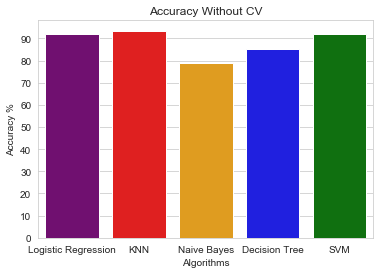

[91.8  93.44 78.69 85.25 91.8 ]


In [46]:
methods = ["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree", "SVM"]
accuracy = [lrscore, knnscore, nbscore, dtscore, svmscore]
colors = ["purple", "red", "orange", "blue","green"]

sns.set_style("whitegrid")
plt.figure()#figsize=(16,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.title("Accuracy Without CV")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()
print(np.round(accuracy,2))

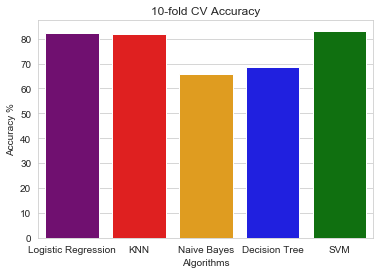

[82.42 81.84 65.83 68.59 83.22]


In [47]:
methods = ["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree", "SVM"]
accuracy = [lrscore_cv, knnscore_cv, nbscore_cv, dtscore_cv, svmscore_cv]
colors = ["purple", "red", "orange", "blue","green"]

sns.set_style("whitegrid")
plt.figure()#figsize=(16,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.title("10-fold CV Accuracy")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()
print(np.round(accuracy,2))

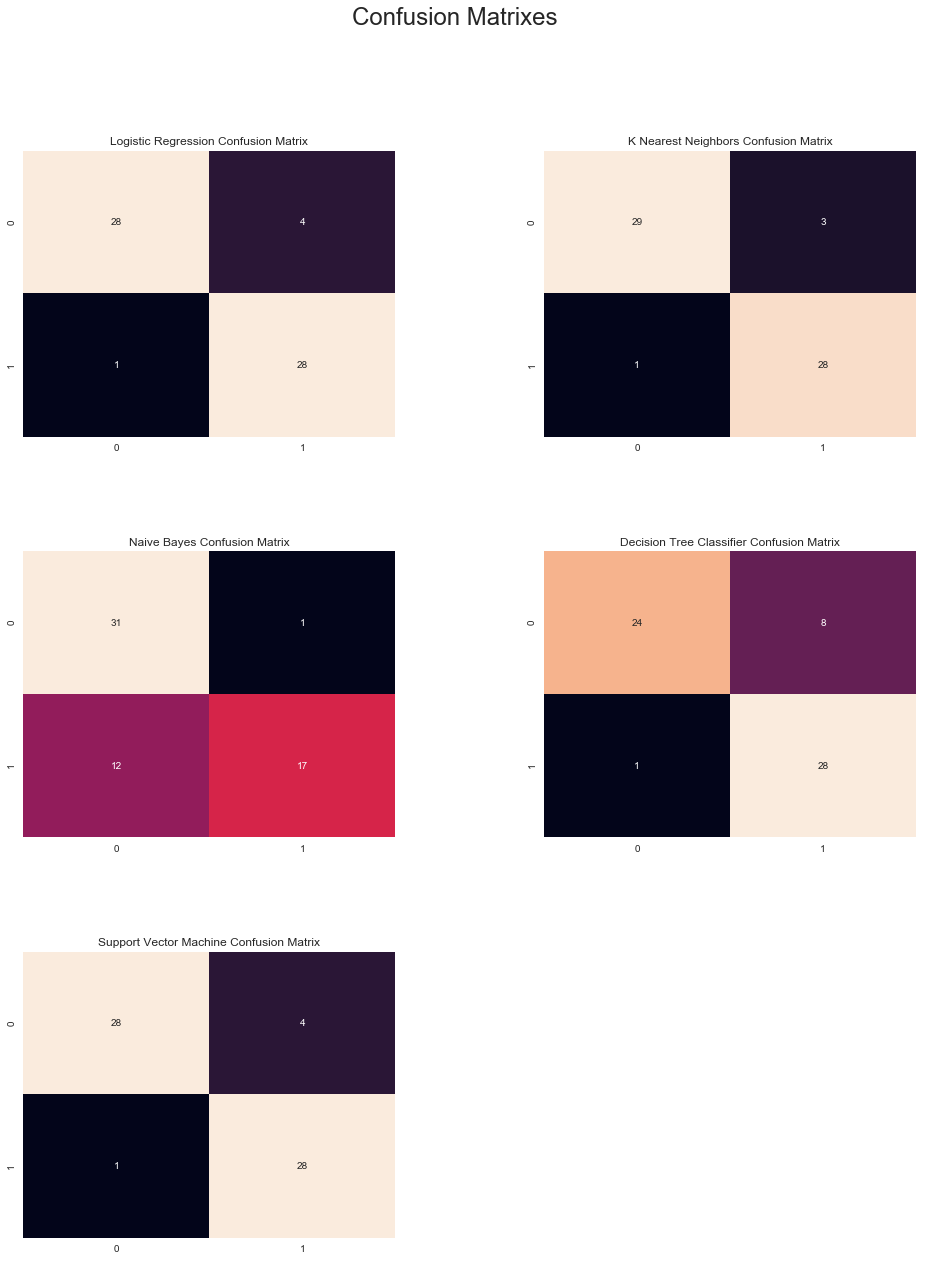

In [48]:
# Confusion Matrix

plt.figure(figsize=(16,20))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,fmt="d",cbar=False)

plt.subplot(3,2,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,fmt="d",cbar=False)

plt.subplot(3,2,3)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,fmt="d",cbar=False)

plt.subplot(3,2,4)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,fmt="d",cbar=False)

plt.subplot(3,2,5)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,fmt="d",cbar=False)

plt.show()
